In [9]:
import seaborn as sns

### Chi-square Test

In [1]:
# what is a chi2 test?

- A  feature selection technique, used when both feature and target are categorical

In [ ]:
# how do we calculate chi2 value?

- We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores
- The variables have to be categorical, sampled independently and values should have an expected frequency greater than 5

In [2]:
# write formula for chi2 value?


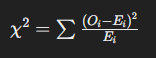

Oi  = Observed frequency for category 

Ei  = Expected frequency for category 

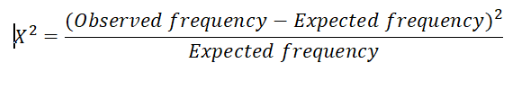

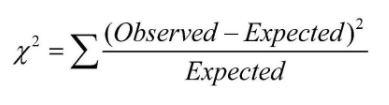

In [3]:
# describe some ke points about chi2 test?

Here are the key points about the chi-square test:

**Categorical Data:** The chi-square test is used when both the independent and dependent variables are categorical. The data are typically presented in a contingency table, which shows the frequency distribution of observations for two or more categorical variables.

**Null Hypothesis (H₀):**

**Degrees of Freedom (df):** The degrees of freedom in a chi-square test depend on the dimensions of the contingency table. For a 2x2 table, df = 1; for larger tables, df = (rows - 1) x (columns - 1).

In [4]:
#  can chi2 test be used for more than two classes?

Variables to be compared should have only 2 categories i.e 1 and 0 the chi-square test fails to determine the correlation between variables with more than 2 categories

In [5]:
# How do we start calculating chi2 test??

While conducting the chi-square test we have to initially consider 2 hypothesis i.e the Null Hypothesis and the Alternate Hypothesis.

H0 (Null Hypothesis) = The 2 variables to be compared are independent.
H1 (Alternate Hypothesis) = The 2 variables are dependent.

Now, if the p-value obtained after conducting the test is less than 0.05 we reject the Null hypothesis and accept the Alternate hypothesis and if the p-value is greater that 0.05 we accept the Null hypothesis and reject the Alternate hypothesis.

In [ ]:
# if value of chi2 is so high what does it mean??

For each feature in the dataset, the Chi2 is calculated and then ordered in descending order according to the Chi2 value.
More value of chi2, more importent feature it is.


In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
iris=load_iris()
X = iris.data
y = iris.target
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
y[0:5]

array([0, 0, 0, 0, 0])

In [5]:
# Convert X into Numeric type
X=X.astype(int)

In [6]:
# make an instant of chi2
chi2=SelectKBest(chi2, k=2)
# transfrom data using chi2 instant
X_kbest=chi2.fit_transform(X,y)

In [7]:
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest.shape[1])

Original feature number: 4
Reduced feature number: 2


### Implementaion 2 Using Seaborn data

In [10]:
df=sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [11]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df.species=le.fit_transform(df['species'])

In [13]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [14]:
X=df.drop('species',axis=1)
y=df.species

In [15]:
chi=SelectKBest(chi2,k=2)
X_Kbest=chi.fit_transform(X,y)

In [16]:
print('X Shape:',X.shape)
print('XKbest Shape:',X_Kbest.shape)

X Shape: (150, 4)
XKbest Shape: (150, 2)


In [6]:
# What is a contigency table??

Also called crosstab, is a table that is used to summarise the relationship between several categorical variables
Here, we take a table that shows the number of men and women buying different types of pets.

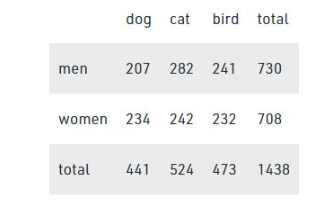

The aim of the test is to conclude whether the two variables( gender and choice of pet ) are related to each other.
We start by defining the null hypothesis (H0) which states that there is no relation between the variables. An alternate hypothesis would state that there is a significant relation between the two.

We can verify the hypothesis by these methods:
- p-vlaue
- chi2 table
- expected value table

In [7]:
# Using p value

We define a significance factor to determine whether the relation between the variables is of considerable significance. Generally a significance factor or alpha value of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting H0 when it is true. A lower alpha value is chosen in cases where we expect more precision. If the p-value for the test comes out to be strictly greater than the alpha value, then H0 holds true.

In [8]:
# Using chi-square value

If our calculated value of chi-square is less or equal to the tabular(also called critical) value of chi-square, then H0 holds true.

Expected Values Table:
we prepare a similar table of calculated(or expected) values using below formula

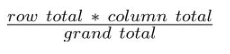

The expected values looks like this

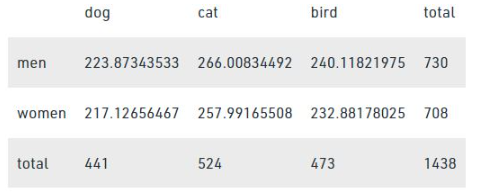

Next we prepare chi2 table using below formula

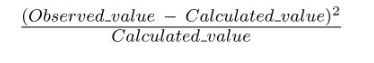

The table looks like as below

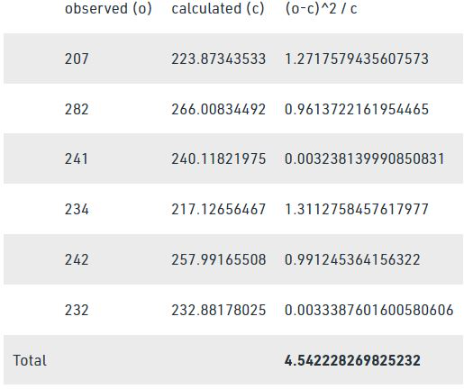

Hence the calculated value of chi-square is 4.542228269825232

Now, we need to find the critical value of chi-square. We can obtain this from a table. To use this table, we need to know the degrees of freedom for the dataset.  The degrees of freedom is defined as : (no. of rows – 1) * (no. of columns – 1).
Hence, the degrees of freedom is (2-1) * (3-1) = 2

Now, let us look at the table and find the value corresponding to 2 degrees of freedom and 0.05 significance factor :

In [12]:
from scipy.stats import chi2_contingency
import seaborn as sns

In [13]:
data = [[207, 282, 241], [234, 242, 232]]

In [16]:
data=sns.load_dataset('tips')
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [17]:
df=data[['total_bill','tip']]

In [18]:
df.head(2)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66


In [19]:
stat, p, dof, expected = chi2_contingency(df)

In [20]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


### ANOTHER EXAMPLE

In [31]:
import seaborn as sns
from scipy.stats import chi2_contingency

In [32]:
df=sns.load_dataset('tips')

In [33]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [34]:
df=df[['total_bill','tip']]

In [35]:
stat,p,dof,expected=chi2_contingency(df)

In [36]:
alpha=0.05
print('P-value is:',str(p))
if p<=alpha:
    print('Dependent (H0 rejected)')
else:
    print('Independet (H0 is True)')

P-value is: 1.0
Independet (H0 is True)
